# <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:130%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>Pingouins Clustering Projects</b></div>

## 🐧 Project Context 🐧
This project is part of my training program and aims to support a team of researchers who have been gathering data on penguins in Antarctica. The dataset, provided in a CSV file named `penguins.csv`, was collected by Dr. Kristen Gorman and the Palmer Station, a member of the Long Term Ecological Research (LTER) Network. This collection offers valuable insights into penguin characteristics across the region.

# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> Table of Contents </b></div>

1. Introduction
2. Importing Required Libraries
3. Reading and Understanding Data
4. Perform preprocessing steps on the dataset to create dummy variables
5. Standardizing Features with StandardScaler
6. Detect the optimal number of clusters for k-means clustering
7. Run the k-means clustering algorithm
8. Conclusions

## <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:130%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 1. Introduction</b></div>


## Data Overview
The dataset includes five main variables, each describing a specific characteristic of the penguins observed:

| Column             | Description                        |
|--------------------|------------------------------------|
| culmen_length_mm   | Culmen length in millimeters      |
| culmen_depth_mm    | Culmen depth in millimeters       |
| flipper_length_mm  | Flipper length in millimeters     |
| body_mass_g        | Body mass in grams                |
| sex                | Sex of the penguin                |

The researchers have not been able to record the species of each penguin but know that at least three species are native to this region: **Adelie**, **Chinstrap**, and **Gentoo**.

## Project Objective
Using data science and unsupervised learning techniques, the goal of this project is to identify meaningful clusters within the dataset that may correspond to different species or distinct groups of penguins. The primary tasks include:

1. Importing, investigating, and pre-processing the `penguins.csv` dataset.
2. Applying cluster analysis to group the data based on a suitable number of clusters.
3. Calculating the average values for each cluster and presenting these in a DataFrame named `stat_penguins`. This DataFrame will contain one row per cluster, displaying the mean of the original numeric variables, excluding any non-numeric columns.


## <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:130%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>2. Importing Required Libraries</b>
</div>

In [175]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>3. Reading and Understanding our Data</b>
</div>

In [176]:
# Loading and examining the dataset
penguins_df = pd.read_csv("Dataset/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [177]:
penguins_df.shape

(332, 5)

In [178]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [179]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>There are <strong>5 columns</strong> in the dataset, which are straightforward and include:
            <ul>
                <li><strong>Culmen Length (mm)</strong>: The length of the culmen measured in millimeters.</li>
                <li><strong>Culmen Depth (mm)</strong>: The depth of the culmen in millimeters.</li>
                <li><strong>Flipper Length (mm)</strong>: The length of the flipper in millimeters.</li>
                <li><strong>Body Mass (g)</strong>: The body mass in grams.</li>
                <li><strong>Sex</strong>: The biological sex of the penguin, either male or female.</li>
            </ul>
        </li>
        <li>There are <strong>332 non-null rows</strong> in the dataset, with no missing values in any column.</li>
        <li>The dataset types include <strong>four numerical columns</strong> (culmen length, culmen depth, flipper length, and body mass) and <strong>one categorical column</strong> (sex).</li>
        <li>Minimum values in these columns are all realistic and relevant to the measurements.</li>
    </ul>
</div>

## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>4. Perform preprocessing steps on the dataset to create dummy variable</b>
</div>

In [180]:
# Create dummy variables for the 'sex' column
dummies = pd.get_dummies(penguins_df["sex"], prefix="sex")

In [181]:
# Convert boolean columns (True/False) to integers (0/1)
dummies = dummies.astype(int)
# Add the new columns to the original DataFrame
penguins_df = pd.concat([penguins_df, dummies], axis=1)

In [182]:
# Delete the 'sex' column from the DataFrame
penguins_df.drop('sex', axis=1, inplace=True)

In [183]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0
328,46.8,14.3,215.0,4850.0,1,0
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,0


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>We have created <strong>dummy variables</strong> for the 'sex' column, which was originally categorical, transforming it into two separate columns:
            <ul>
                <li><strong>sex_FEMALE</strong>: A binary variable where 1 indicates a female penguin, and 0 indicates otherwise.</li>
                <li><strong>sex_MALE</strong>: A binary variable where 1 indicates a male penguin, and 0 indicates otherwise.</li>
            </ul>
        </li>
        <li>The original 'sex' column has been removed from the dataset.</li>
</div>

## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>5. Standardizing Features with StandardScaler</b>
</div>

StandardScaler is used to standardize features by scaling them to have a mean of 0 and a standard deviation of 1, which ensures that all features contribute equally to the model, preventing any single feature with a larger scale from dominating the learning process.

In [184]:
# Convert all columns to float64 type 
penguins_df = penguins_df.astype('float64')

In [185]:
# Initialize Standard Scaler
scaler = StandardScaler()

In [186]:
# Apply scaler to all columns
penguins_df[:] = scaler.fit_transform(penguins_df)

In [187]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


In [188]:
# Verify the mean and std
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17,1.391123e-16,-1.391123e-16
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00,-9.939939e-01,-1.006042e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01,-9.939939e-01,-1.006042e+00
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01,-9.939939e-01,9.939939e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01,1.006042e+00,9.939939e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00,1.006042e+00,9.939939e-01


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>We have <strong>standardized the features</strong> of the dataset using <strong>StandardScaler</strong>, which normalizes the data to have a mean of 0 and a standard deviation of 1. This process was applied to all numerical columns.
        </li>
        <li>The <strong>mean and standard deviation</strong> of all columns are now approximately 0 and 1 respectively, as shown below:</li>
        <ul>
            <li><strong>Mean</strong>: Close to 0 for all columns, indicating that the data is centered around zero.</li>
            <li><strong>Standard Deviation</strong>: 1 for all columns, confirming that the data is scaled to a standard unit.</li>
            <li><strong>Min and Max Values</strong>: The standardized values now range from negative to positive, with the minimum values close to -2 and the maximum values reaching around 2.6.</li>
        </ul>
    </ul>
</div>

## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>6. Detect the optimal number of clusters for k-means clustering</b>
</div>


The elbow method helps choose the optimal number of clusters by identifying the point where the reduction in inertia slows down. This "elbow" indicates the best balance between model simplicity and accurate grouping, avoiding overfitting with too many clusters.

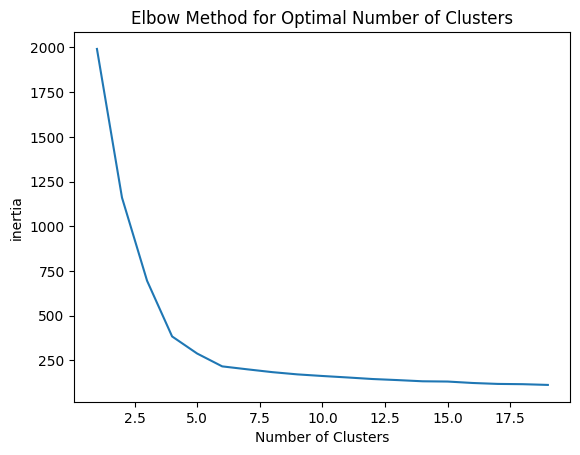

In [189]:
# List to store the WCSS (Within-Cluster Sum of Squares)
inertia = []

# Perform clustering for a range of cluster numbers
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(penguins_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 20), inertia)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>We used the <strong>Elbow Method</strong> to determine the optimal number of clusters for our KMeans clustering algorithm. The method helps to identify the point at which adding more clusters does not significantly improve the model's performance. The steps are as follows:
            <ul>
                <li>We calculated the <strong>Within-Cluster Sum of Squares (WCSS)</strong> for different numbers of clusters (from 1 to 19).</li>
                <li>We plotted the <strong>inertia</strong> (WCSS) values against the number of clusters.</li>
            </ul>
        </li>
        <li>The optimal number of clusters, based on the Elbow Method, is <strong>4 clusters</strong>, as the inertia curve shows a clear "elbow" point at this value.</li>
        <li>Using more clusters than 4 could lead to <strong>overfitting</strong>, where the model becomes too complex and starts capturing noise rather than true patterns in the data.</li>
        <li>The Elbow graph showed that 4 clusters minimize the inertia without overcomplicating the model.</li>
        <li>By selecting 4 clusters, we can better balance model complexity and data fitting.</li>
    </ul>
</div>

# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>7. Run the k-means clustering algorithm</b>
</div>

In [190]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_df)
penguins_df['label'] = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


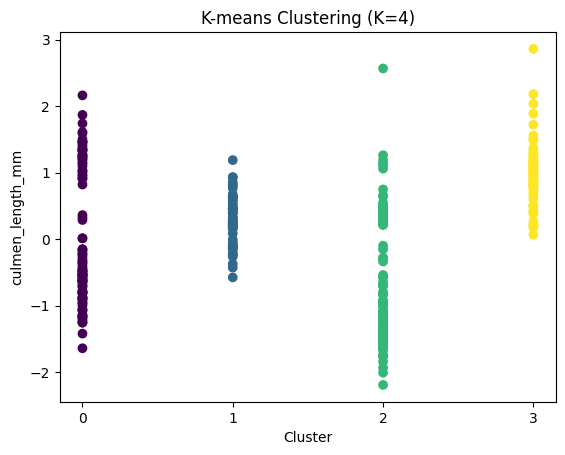

In [191]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={4})')
plt.show()

In [192]:
# create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,-0.026226,1.000505,-0.443228
1,0.283365,-1.489322,0.837042
2,-0.698596,0.234097,-0.851183
3,1.001551,-0.733134,1.467381


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>We ran the <strong>K-means clustering algorithm</strong> with <strong>4 clusters</strong> on the dataset.</li>
        <li>The cluster labels were added as a new column, <strong>'label'</strong>, to the dataset.</li>
        <li>We visualized the clustering results for the <strong>'culmen_length_mm'</strong> column by plotting a scatter plot, where each point represents a penguin and is colored according to its assigned cluster.</li>
        <li>The <strong>scatter plot</strong> showed the separation of data points based on the clusters, allowing us to visually assess the distribution of the 'culmen_length_mm' across different clusters.</li>
        <li>We then created a final <strong>stat_penguins</strong> DataFrame, containing the average values of the numeric columns.</li>
        <li>Each cluster represents a group of penguins with similar characteristics in terms of the measured physical features.</li>
    </ul>
</div>

## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>8. Conclusion</b>
</div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this project, we applied several key techniques to analyze and cluster penguin data based on their physical features.</li>
        <li><strong>Data Exploration:</strong> We started by inspecting the dataset, understanding its columns, and identifying any missing or irrelevant data. The dataset was clean with no missing values, making it ready for further analysis.</li>
        <li><strong>Feature Standardization:</strong> To prepare the data for clustering, we standardized the numerical features using <strong>StandardScaler</strong>. This step normalized the data, ensuring that all features contributed equally to the clustering algorithm.</li>
        <li><strong>Optimal Number of Clusters:</strong> We applied the <strong>Elbow Method</strong> to determine the ideal number of clusters for the K-means algorithm. The method suggested that 4 clusters would be optimal, as this minimized the Within-Cluster Sum of Squares (WCSS) without overfitting the model.</li>
        <li><strong>K-means Clustering:</strong> Using K-means, we successfully clustered the data into 4 distinct groups. Each group represents penguins with similar characteristics based on the physical features like culmen length, depth, and flipper length.</li>
        <li><strong>Cluster Insights:</strong> We further analyzed the clusters by calculating the mean values for the numerical columns within each cluster. This allowed us to interpret the differences between the clusters and understand the unique characteristics of each group of penguins.</li>
        <li><strong>Conclusion:</strong> By applying clustering techniques, we were able to identify meaningful patterns in the penguin dataset. The project demonstrated the power of data preprocessing, feature standardization, and unsupervised learning in uncovering hidden structures in real-world data.</li>
    </ul>
</div>

🐧